# FBProphet

Forecasting Housing Market using FBProphet

Let us model some time-series data!  using Facebook Prophet package.
We will be doing an example here! Installing the necessary packages might take a couple of minutes. In the meantime, I can talk a bit about Facebook Prophet, a tool that allows folks to forecast using additive or component models relatively easily. It can also include things like:
Day of week effects
Day of year effects
Holiday effects
Trend trajectory
Can do MCMC sampling

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
Accurate and fast.
Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. We’ve found it to perform better than any other approach in the majority of cases. We fit models in Stan so that you get forecasts in just a few seconds.
Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.
Tunable forecasts.
The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge.
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.
https://facebook.github.io/prophet/docs/quick_start.html#python-api
We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.
# Python
m = Prophet()
m.fit(df)

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.
Using Prophet is extremely straightforward. You import it, load some data into a pandas dataframe, set the data up into the proper format and then start modeling 


# importing dataset

In [6]:
import pandas as pd
import numpy as np
housing_df = pd.read_csv('C:/scripts/capstone2/housing_df.csv', index_col='DATE')
housing_df.info()


h_m_df = pd.read_csv('C:/scripts/capstone2/h_m_df.csv', index_col=0)
h_m_df.info()
h_m_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1962-01-01 to 2018-12-01
Data columns (total 10 columns):
ASPUS_M        684 non-null float64
H_RATIO_M      684 non-null float64
HSN1F_M        684 non-null int64
PERMIT_M       684 non-null int64
STOCK_MKT_M    684 non-null float64
BAA10YM        684 non-null float64
US10Y_M        684 non-nul

,ASPUS_M,H_RATIO_M,HSN1F_M,PERMIT_M,STOCK_MKT_M,BAA10YM,US10Y_M,RPCE_M,LRUN_UEMP,GDP_M
DATE,,,,,,,,,,
1962-01-01,19300.0,4.7,591,1122,-1.194624,1.00,4.08,4.30,6.536096,7.300000
1962-02-01,19300.0,4.7,591,1194,-4.306072,1.03,4.04,4.53,6.202647,6.100000
1962-03-01,19300.0,4.7,591,1134,-7.417520,1.11,3.93,4.77,5.869198,4.900000
1962-04-01,19300.0,4.7,591,1235,-10.528967,1.18,3.84,5.00,5.535749,3.700000
1962-05-01,19300.0,4.7,591,1142,-9.215257,1.13,3.87,4.40,5.437348,4.133333


In [8]:
#conda install pystan
#!pip install fbprophet
import matplotlib.pylab as plt
import seaborn as sns

import matplotlib
from fbprophet import Prophet
import datetime
from datetime import datetime

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


X1 = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y1 = np.array(housing_df['ASPUS_3A_PCT_CHG'])

X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])


In [9]:
df = h_m_df.reset_index()
df.head(3)

,DATE,ASPUS_M,H_RATIO_M,HSN1F_M,PERMIT_M,STOCK_MKT_M,BAA10YM,US10Y_M,RPCE_M,LRUN_UEMP,GDP_M
0,1962-01-01,19300.0,4.7,591,1122,-1.194624,1.00,4.08,4.30,6.536096,7.3
1,1962-02-01,19300.0,4.7,591,1194,-4.306072,1.03,4.04,4.53,6.202647,6.1
2,1962-03-01,19300.0,4.7,591,1134,-7.417520,1.11,3.93,4.77,5.869198,4.9


Let's rename the columns as required by fbprophet. Additioinally, fbprophet doesn't like the index to be a datetime...it wants to see 'ds' as a non-index column, so we won't set an index differnetly than the integer index.

In [10]:
df=df.rename(columns={'DATE':'ds', 'ASPUS_M':'y'})
df1=df.rename(columns={'DATE':'ds', 'ASPUS_M':'y'})


'''Note the format of the dataframe. This is the format that Prophet expects to see. There needs to be a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.'''


In [12]:

df=df[['ds', 'y']]
df.tail()

,ds,y
679,2018-08-01,388233.3333
680,2018-09-01,383566.6667
681,2018-10-01,378900.0000
682,2018-11-01,378900.0000
683,2018-12-01,378900.0000


Before we can do any analysis with this data, we need to log transform the ‘y’ variable to a try to convert non-stationary data to stationary. This also converts trends to more linear trends (see this website for more info). This isn’t always a perfect way to handle time-series data, but it works often enough that it can be tried initially without much worry.

To log-tranform the data, we can use np.log() on the ‘y’ column like this:

In [13]:
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
df['y'] = np.log(df['y'])
df.tail()

,ds,y,y_orig
679,2018-08-01,12.869362,388233.3333
680,2018-09-01,12.857269,383566.6667
681,2018-10-01,12.845028,378900.0000
682,2018-11-01,12.845028,378900.0000
683,2018-12-01,12.845028,378900.0000


'''Its time to start the modeling.  You can do this easily with the following command:'''


In [14]:
model = Prophet() #instantiate Prophet
model.fit(df) #fit the model with your dataframe


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\achow\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


'''Now its time to start forecasting. With Prophet, you start by building some future time data with the following command:'''

In [17]:
#create 12 months of future data
future_data_y = model.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data_y = model.predict(future_data_y)

#create 24 months of future data
future_data_2y = model.make_future_dataframe(periods=24, freq = 'm')

#forecast the data for future data
forecast_data_2y = model.predict(future_data_2y)


#create 36 months of future data
future_data_3y = model.make_future_dataframe(periods=36, freq = 'm')

#forecast the data for future data
forecast_data_3y = model.predict(future_data_3y)

future_data_5y = model.make_future_dataframe(periods=60, freq = 'm')

#forecast the data for future data
forecast_data_5y = model.predict(future_data_5y)

future_data_10y = model.make_future_dataframe(periods=120, freq = 'm')

#forecast the data for future data
forecast_data_10y = model.predict(future_data_10y)

forecast_data_3y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 16 columns):
ds                            720 non-null datetime64[ns]
trend                         720 non-null float64
yhat_lower                    720 non-null float64
yhat_upper                    720 non-null float64
trend_lower                   720 non-null float64
trend_upper                   720 non-null float64
additive_terms                720 non-null float64
additive_terms_lower          720 non-null float64
additive_terms_upper          720 non-null float64
yearly                        720 non-null float64
yearly_lower                  720 non-null float64
yearly_upper                  720 non-null float64
multiplicative_terms          720 non-null float64
multiplicative_terms_lower    720 non-null float64
multiplicative_terms_upper    720 non-null float64
yhat                          720 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 90.1 KB


In [18]:
forecast_data_3y.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
717,2021-09-30,12.945944,12.858008,13.044995,12.880010,13.031531,-0.000749,-0.000749,-0.000749,-0.000749,-0.000749,-0.000749,0.0,0.0,0.0,12.945194
718,2021-10-31,12.948637,12.865197,13.049788,12.876844,13.037250,0.000837,0.000837,0.000837,0.000837,0.000837,0.000837,0.0,0.0,0.0,12.949473
719,2021-11-30,12.951243,12.859339,13.058393,12.872691,13.043829,0.001051,0.001051,0.001051,0.001051,0.001051,0.001051,0.0,0.0,0.0,12.952294


'''In this line of code, we are creating a pandas dataframe with 12 (periods = 12) future data points with a monthly frequency (freq = ‘m’).  If you’re working with daily data, you wouldn’t want include freq=’m’.'''


'''Now we forecast using the ‘predict’ command:
If you take a quick look at the data using .head() or .tail(), you’ll notice there are a lot of columns in the forecast_data dataframe. The important ones (for now) are ‘ds’ (datetime), ‘yhat’ (forecast), ‘yhat_lower’ and ‘yhat_upper’ (uncertainty levels).'''

In [19]:
forecast_data_y[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
691,2019-07-31,12.874549,12.829491,12.921294
692,2019-08-31,12.878652,12.831927,12.923366
693,2019-09-30,12.881320,12.830136,12.927916
694,2019-10-31,12.886400,12.835200,12.934713
695,2019-11-30,12.889210,12.836957,12.944393


'''Let’s take a look at a graph of this data to get an understanding of how well our model is working.'''

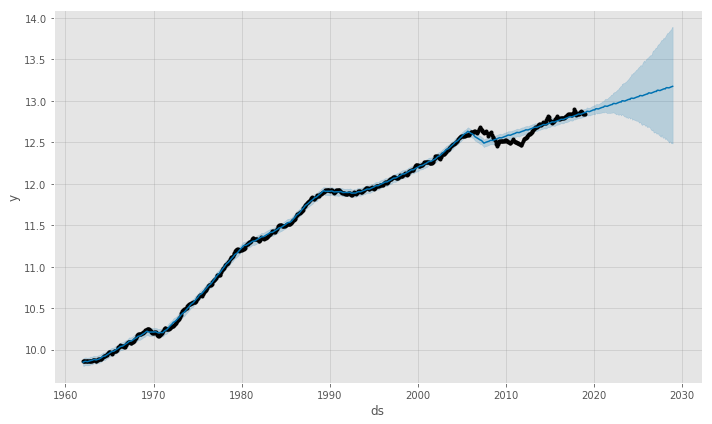

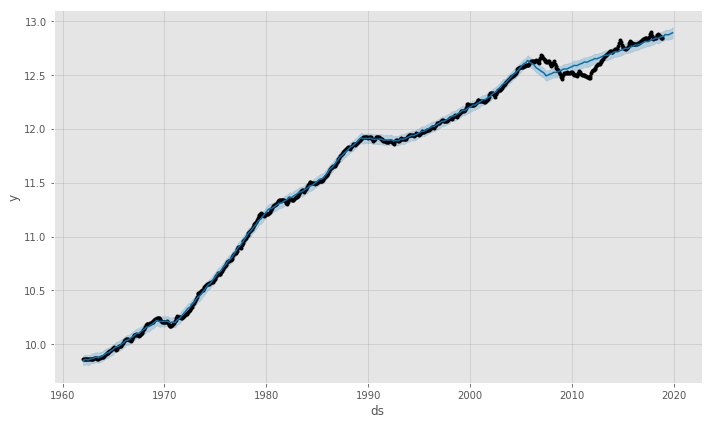

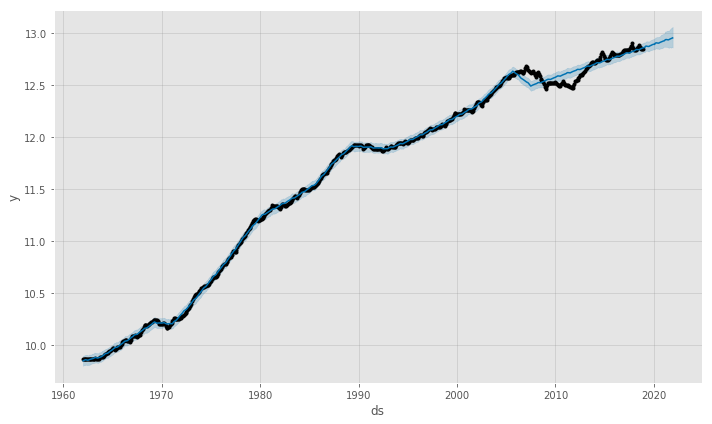

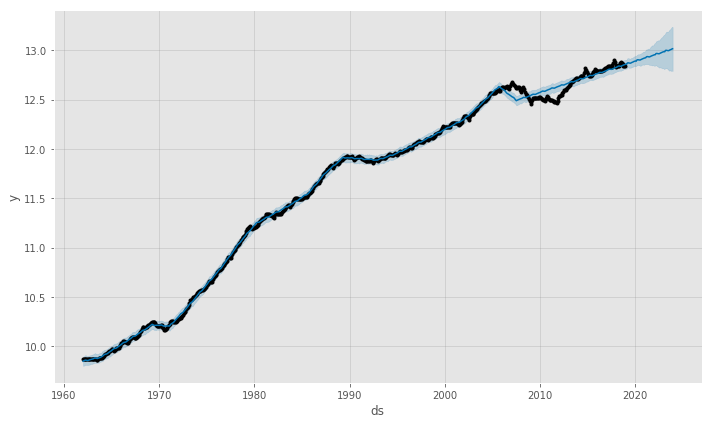

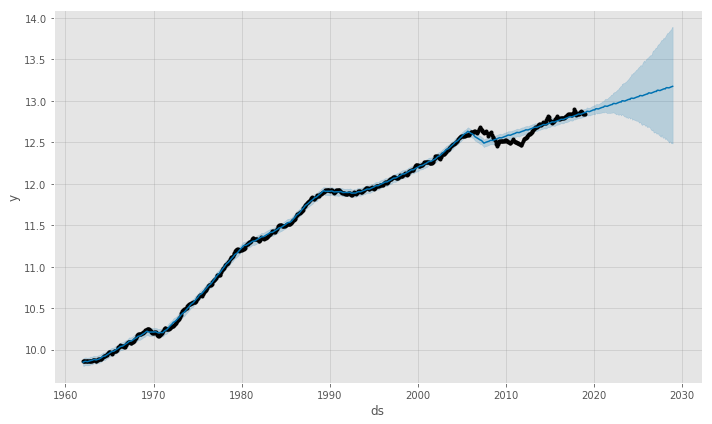

In [24]:

model.plot(forecast_data_y)
model.plot(forecast_data_3y)
model.plot(forecast_data_5y)
model.plot(forecast_data_10y)

'''That looks pretty good. Now, let’s take a look at the seasonality and trend components of our /data/model/forecast.'''

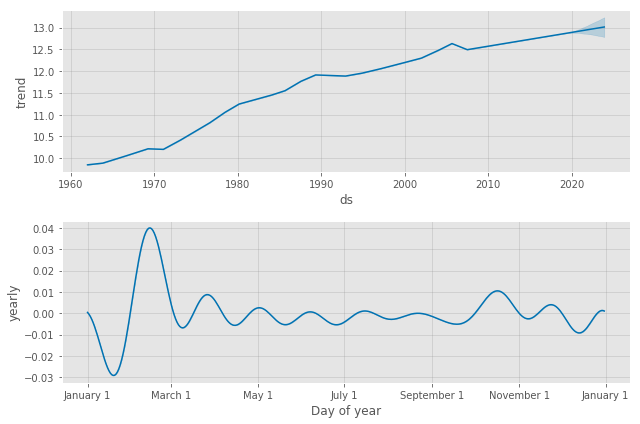

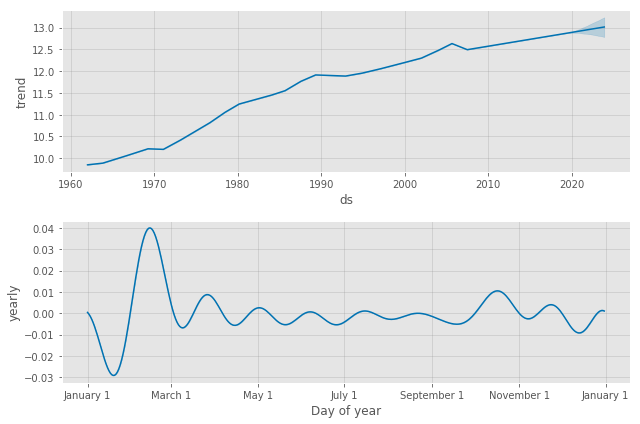

In [25]:
model.plot_components(forecast_data_5y)

From the trend and seasonality, we can see that the trend is a playing a large part in the underlying time series and seasonality comes into play more toward the beginning of the year.

So far so good.  With the above info, we’ve been able to quickly model and forecast some data to get a feel for what might be coming our way in the future from this particular data set.

Forecast plot to display our ‘original’ data so you can see the forecast in ‘context’ and in the original scale rather than the log-transformed data. We can do this by using np.exp() to get our original data back.

In [26]:
forecast_data_5y_orig = forecast_data_5y # make sure we save the original forecast data
forecast_data_5y_orig['yhat'] = np.exp(forecast_data_5y_orig['yhat'])
forecast_data_5y_orig['yhat_lower'] = np.exp(forecast_data_5y_orig['yhat_lower'])
forecast_data_5y_orig['yhat_upper'] = np.exp(forecast_data_5y_orig['yhat_upper'])

Let’s take a look at the forecast with the original data:

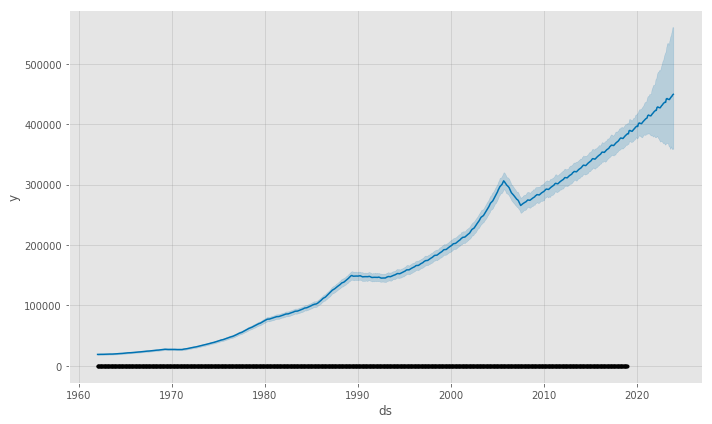

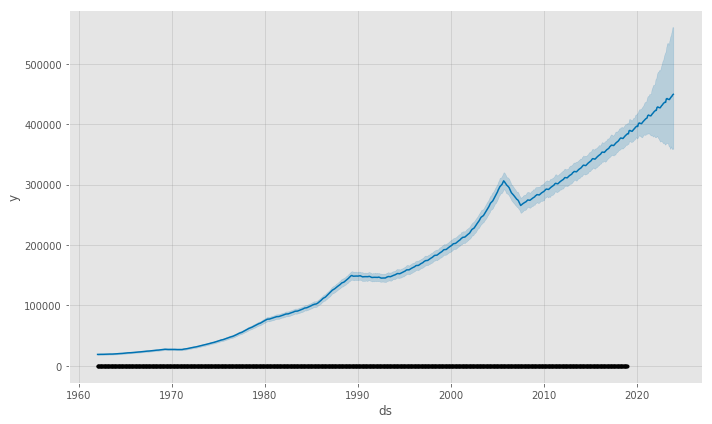

In [27]:

model.plot(forecast_data_5y_orig)

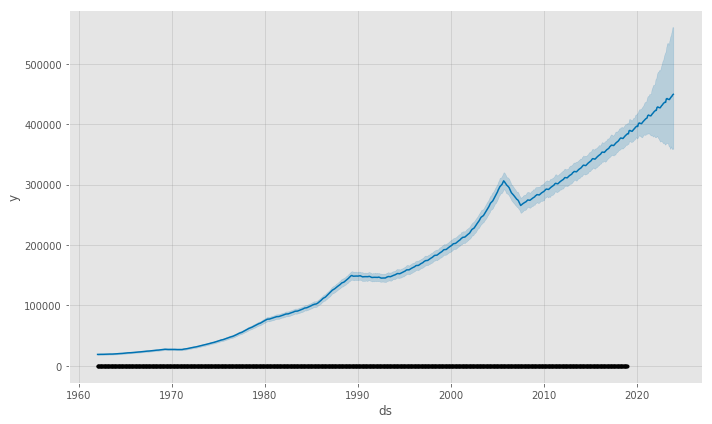

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 4 columns):
ds        684 non-null object
y         684 non-null float64
y_orig    684 non-null float64
y_log     684 non-null float64
dtypes: float64(3), object(1)
memory usage: 21.5+ KB


In [28]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig'] #copy the original data to 'y'

model.plot(forecast_data_5y_orig)
plt.show()
df.info()

There we got the forecast for Housing Price 60 months into the future (you have to look closely at the very far right-hand side for the forecast). It looks like the next sixths months will see sales between 360K and 570K.

We make a dataframe for future predictions as before, except we must also specify the capacity in the future. Here we keep capacity constant at the same value as in the history, and forecast 3 years into the future:

In [29]:
df['cap'] = 30

df['floor'] =1

#considreing your dataframe
#df = pandas.read_csv('yourCSV')
cap = df['cap']
flr = df['floor']
df['cap'] = cap
df['floor'] = flr

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 6 columns):
ds        684 non-null object
y         684 non-null float64
y_orig    684 non-null float64
y_log     684 non-null float64
cap       684 non-null int64
floor     684 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 32.1+ KB


,ds,y,y_orig,y_log,cap,floor
0,1962-01-01,19300.0,19300.0,9.86786,30,1
1,1962-02-01,19300.0,19300.0,9.86786,30,1
2,1962-03-01,19300.0,19300.0,9.86786,30,1
3,1962-04-01,19300.0,19300.0,9.86786,30,1
4,1962-05-01,19300.0,19300.0,9.86786,30,1


In [31]:
model=Prophet(changepoint_range=0.8, changepoint_prior_scale=0.12, growth='logistic',
                    seasonality_mode='additive', interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True) 
model.add_seasonality(name="monthly", period=30.5, fourier_order=12, prior_scale=0.02)
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


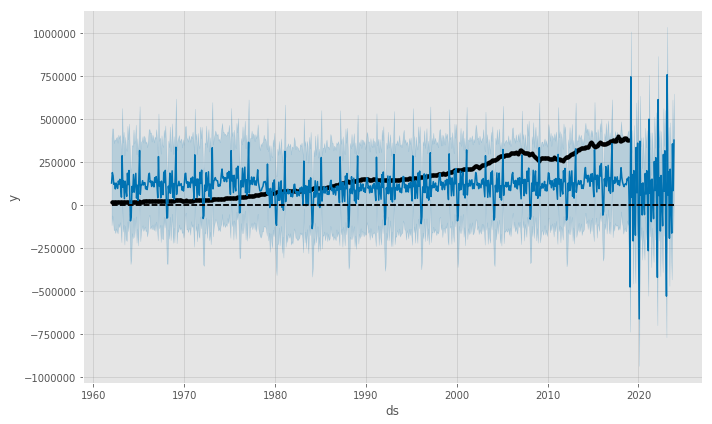

In [32]:
#create 12 months of future data
future_data = model.make_future_dataframe(periods=60, freq = 'm')
type(future_data)
future_data.tail()

future_data['cap']=30
future_data['floor']=1

forecast_data = model.predict(future_data) 

fig = model.plot(forecast_data, uncertainty=True)


If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts:

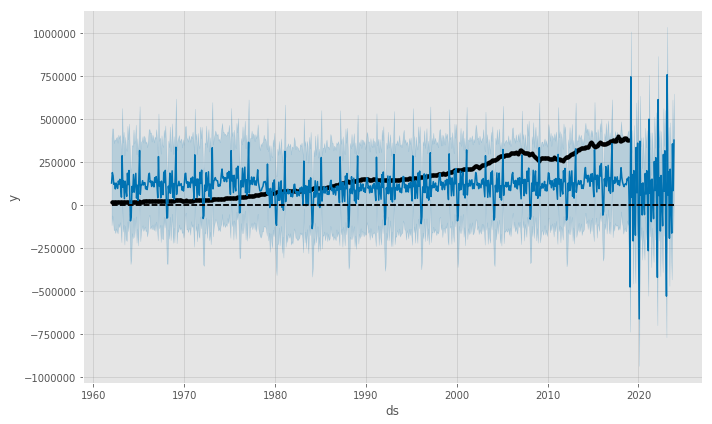

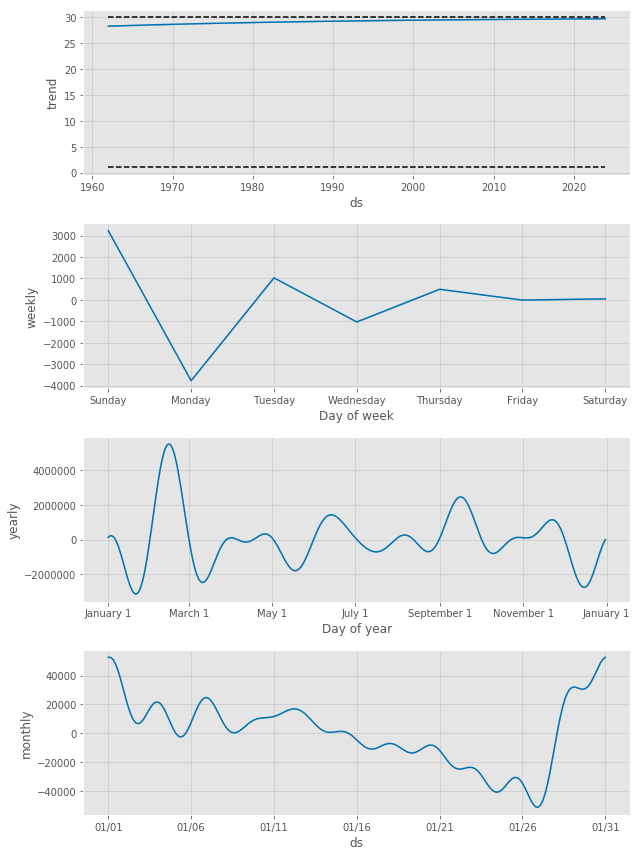

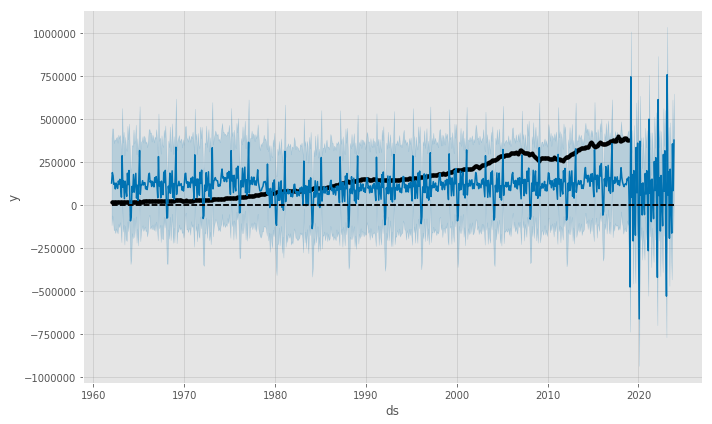

In [33]:
fig2 = model.plot_components(forecast_data, uncertainty=True)

model.plot(forecast_data)

While this is a nice chart, it is kind of ‘busy’ for me.  Additionally, I like to view my forecasts with original data first and forecasts appended to the end (this ‘might’ make sense in a minute).

First, we need to get our data combined and indexed appropriately to start plotting. We are only interested (at least for the purposes of this article) in the ‘yhat’, ‘yhat_lower’ and ‘yhat_upper’ columns from the Prophet forecasted dataset.  Note: There are much more pythonic ways to these steps, but I’m breaking them out for each of understanding.

In [34]:
df.head()
df.info()
df.set_index('ds', inplace=True)
forecast_data.set_index('ds', inplace=True)
viz_df = df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

viz_df.info()
viz_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 6 columns):
ds        684 non-null object
y         684 non-null float64
y_orig    684 non-null float64
y_log     684 non-null float64
cap       684 non-null int64
floor     684 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 32.1+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 1962-01-01 to 2023-11-30
Data columns (total 8 columns):
y             684 non-null float64
y_orig        684 non-null float64
y_log         684 non-null float64
cap           684 non-null float64
floor         684 non-null float64
yhat          744 non-null float64
yhat_lower    744 non-null float64
yhat_upper    744 non-null float64
dtypes: float64(8)
memory usage: 52.3 KB


,y,y_orig,y_log,cap,floor,yhat,yhat_lower,yhat_upper
ds,,,,,,,,
1962-01-01,19300.0,19300.0,9.86786,30.0,1.0,128759.900652,-115615.894394,390064.676754
1962-02-01,19300.0,19300.0,9.86786,30.0,1.0,189614.955722,-59934.843326,446806.529034
1962-03-01,19300.0,19300.0,9.86786,30.0,1.0,172493.550865,-94250.444637,445489.824220
1962-04-01,19300.0,19300.0,9.86786,30.0,1.0,121179.778408,-145613.753306,361373.276365
1962-05-01,19300.0,19300.0,9.86786,30.0,1.0,127026.555036,-140653.957107,383392.237439


You don’t need to delete the ‘y’and ‘index’ columns, but it makes for a cleaner dataframe.

If you ‘tail’ your dataframe, your data should look something like this:

In [35]:
del viz_df['y']
#del viz_df['index']

viz_df=viz_df[['y_orig', 'yhat', 'yhat_lower', 'yhat_upper']]
viz_df.tail()
viz_df.head()
viz_df.describe()

viz_df['yhat_rescaled'] = viz_df['yhat']
viz_df.tail()

,y_orig,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
2023-07-31,NaN,-9524.896519,-263896.024676,256718.809720,-9524.896519
2023-08-31,NaN,-162375.040903,-431723.316565,116948.487470,-162375.040903
2023-09-30,NaN,356546.713962,101518.608083,614314.667218,356546.713962
2023-10-31,NaN,84719.681780,-159591.619490,335345.441524,84719.681780
2023-11-30,NaN,378458.174790,112313.209886,649077.158313,378458.174790


Let's take a look at the Housing Price and yhat_rescaled data together in a chart.

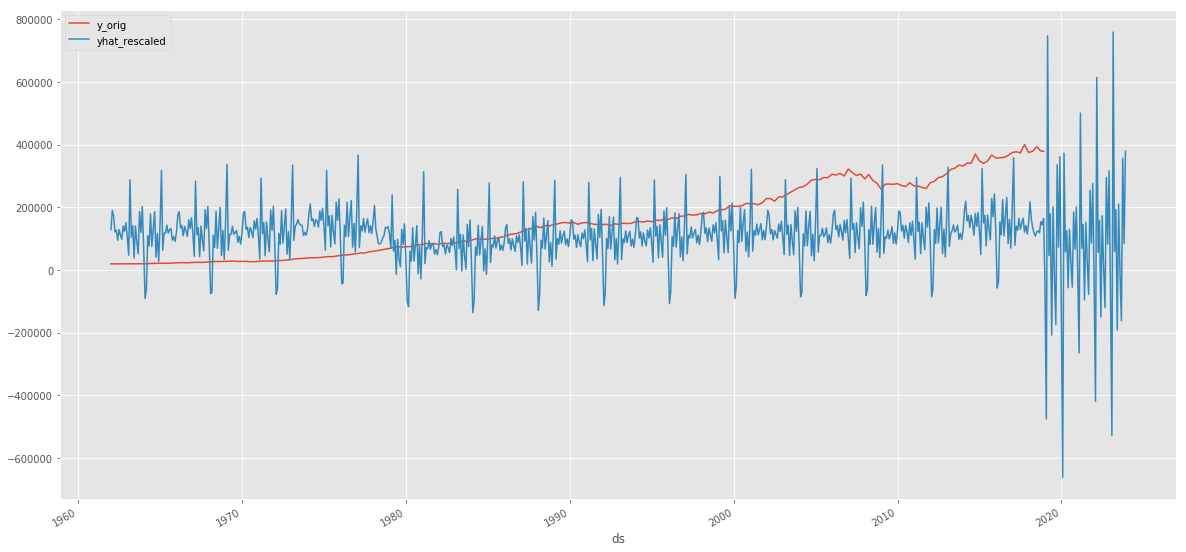

In [36]:
viz_df[['y_orig', 'yhat_rescaled']].plot()


First, we need to get the last date in the original sales data. This will be used to split the data for plotting.'

In [37]:
df.index = pd.to_datetime(df.index)
last_date = df.index[-1]

To plot our forecasted data, we’ll set up a function (for re-usability). This function imports a couple of extra libraries for subtracting dates (timedelta) and then sets up the function.

In [41]:
import pandas as pd
import numpy as np
h_m_df2 = pd.read_csv('C:/scripts/capstone2/h_m_df2.csv', index_col='DATE', parse_dates=True)
h_m_df2.head()

,ASPUS_M
DATE,
1962-01-01,19300.0
1962-02-01,19300.0
1962-03-01,19300.0
1962-04-01,19300.0
1962-05-01,19300.0


Import monthly housing data

In [42]:
from fbprophet import Prophet
import datetime
from datetime import datetime

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

#Looking at the recent data
df4 = h_m_df2.loc['19980102':'20181201'] 
df2 = df4.reset_index()
df3 = df4.reset_index()  #df3_orig
#df2=[['DATE', 'ASPUS_M']]
df2.head()
df3.head() #orig
df2=df2.rename(columns={'DATE':'ds', 'ASPUS_M':'y'})
df2.tail()

,ds,y
246,2018-08-01,388233.3333
247,2018-09-01,383566.6667
248,2018-10-01,378900.0000
249,2018-11-01,378900.0000
250,2018-12-01,378900.0000


Let's rename the columns as required by fbprophet. Additioinally, fbprophet doesn't like the index to be a datetime...it wants to see 'ds' as a non-index column, so we won't set an index differnetly than the integer index.

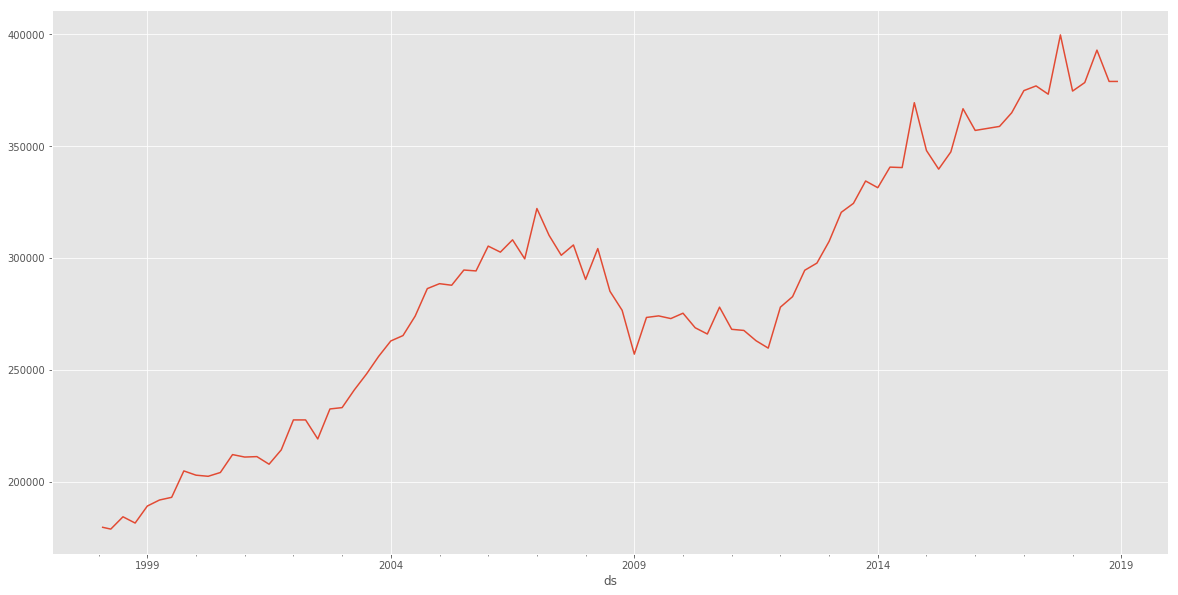

In [43]:
df2.set_index('ds').y.plot()

Original Housing Monthly Data

,ds,y,y_orig
246,2018-08-01,12.869362,388233.3333
247,2018-09-01,12.857269,383566.6667
248,2018-10-01,12.845028,378900.0000
249,2018-11-01,12.845028,378900.0000
250,2018-12-01,12.845028,378900.0000


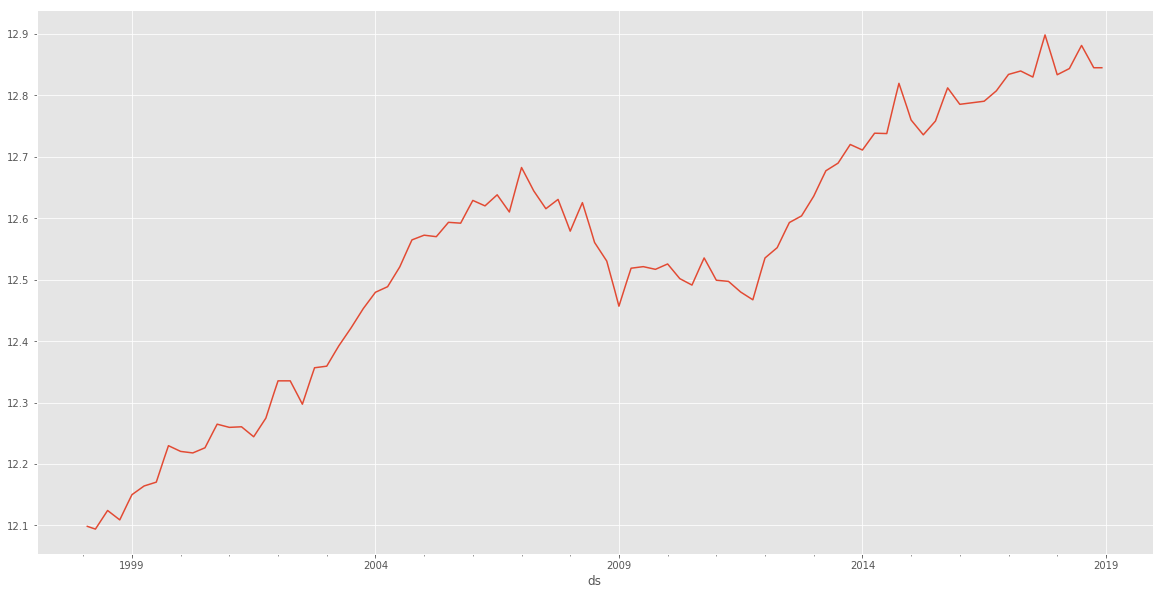

In [44]:
df2['y_orig'] = df2['y'] # to save a copy of the original data..you'll see why shortly.
df2['y'] = np.log(df2['y'])
df2.set_index('ds').y.plot() 
df2.tail()


In [45]:
### Logistic Growth
df2['cap'] = 30
df2['floor'] =1

cap = df2['cap']
flr = df2['floor']
df2['cap'] = cap
df2['floor'] = flr

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
ds        251 non-null datetime64[ns]
y         251 non-null float64
y_orig    251 non-null float64
cap       251 non-null int64
floor     251 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 9.9 KB


,ds,y,y_orig,cap,floor
0,1998-02-01,12.098487,179600.0000,30,1
1,1998-03-01,12.096258,179200.0000,30,1
2,1998-04-01,12.094023,178800.0000,30,1
3,1998-05-01,12.104224,180633.3333,30,1
4,1998-06-01,12.114323,182466.6667,30,1


By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. This default works in many situations but not all, and can be change using the changepoint_range argument. For example, m = Prophet(changepoint_range=0.9) in Python will place potential changepoints in the first 90% of the time series.

Adjusting trend flexibility
If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:'''
#95-96  .9-.95  -60-80

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\achow\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


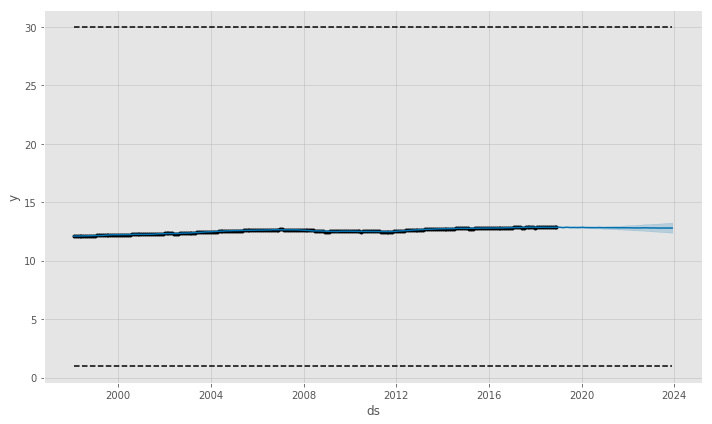

In [46]:
model=Prophet(changepoint_range=0.97, changepoint_prior_scale=0.96, growth='logistic',
                    seasonality_mode='additive', interval_width=0.70, yearly_seasonality=True, weekly_seasonality=True) 
model.add_seasonality(name="monthly", period=12, fourier_order=120, prior_scale=0.5)
model.fit(df2);

#create 12 months of future data
future_data = model.make_future_dataframe(periods=60, freq = 'm')
type(future_data)
future_data.tail()

future_data['cap']=30
future_data['floor']=1

forecast_data = model.predict(future_data) 
fig = model.plot(forecast_data, uncertainty=True)

Even though we have a lot of places where the rate can possibly change, because of the sparse prior, most of these changepoints go unused. We can see this by plotting the magnitude of the rate change at each changepoint:

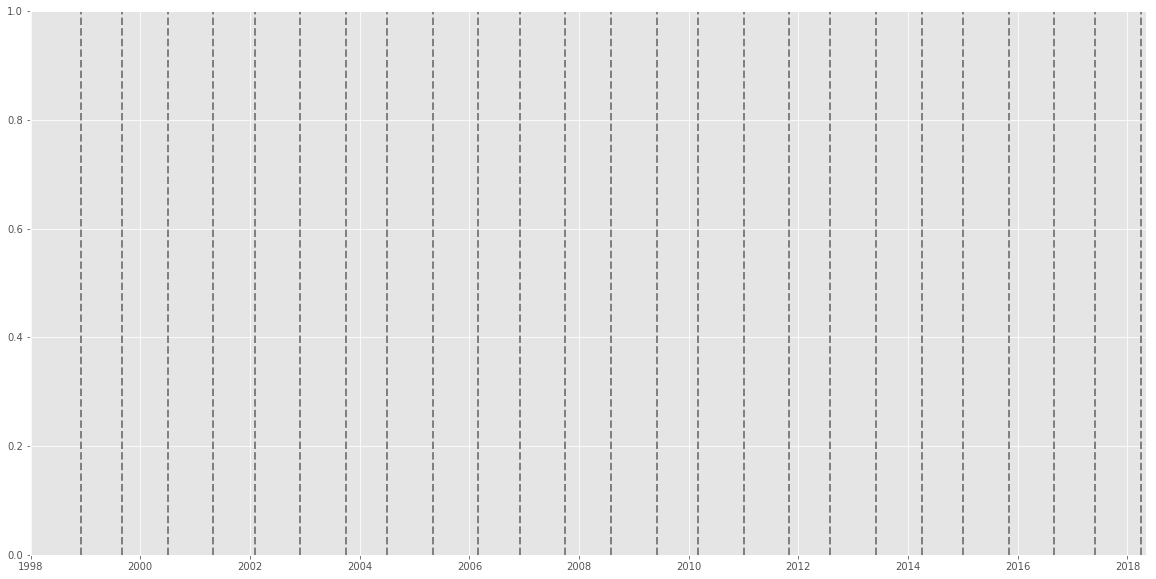

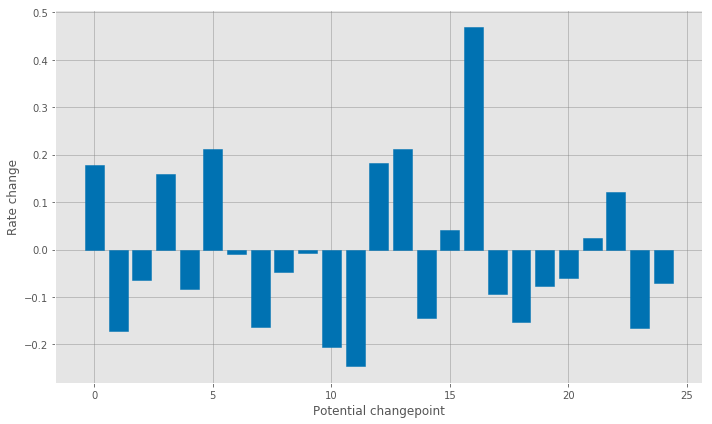

In [47]:
for cp in model.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)
    
deltas = model.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.4)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()   

The number of potential changepoints can be set using the argument n_changepoints, but this is better tuned by adjusting the regularization. The locations of the signification changepoints can be visualized with:

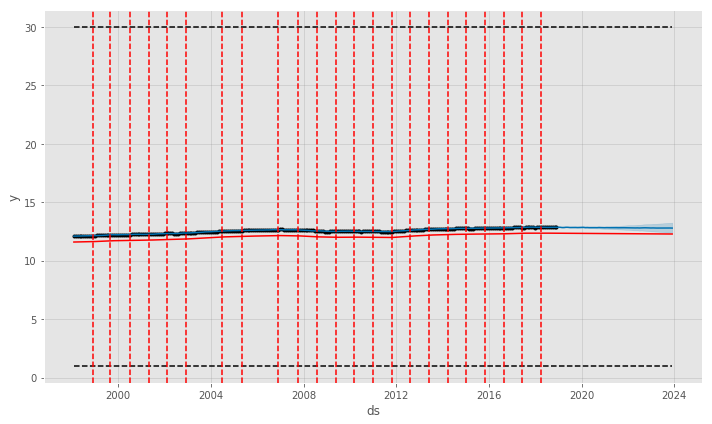

In [48]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

In [49]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
306,2023-07-31,12.786866,12.435150,13.207405
307,2023-08-31,12.790330,12.420118,13.220739
308,2023-09-30,12.788353,12.407588,13.230428
309,2023-10-31,12.791838,12.401196,13.236067
310,2023-11-30,12.785865,12.386704,13.252775


Plotting Prophet results
Prophet has a plotting mechanism called plot. This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).'

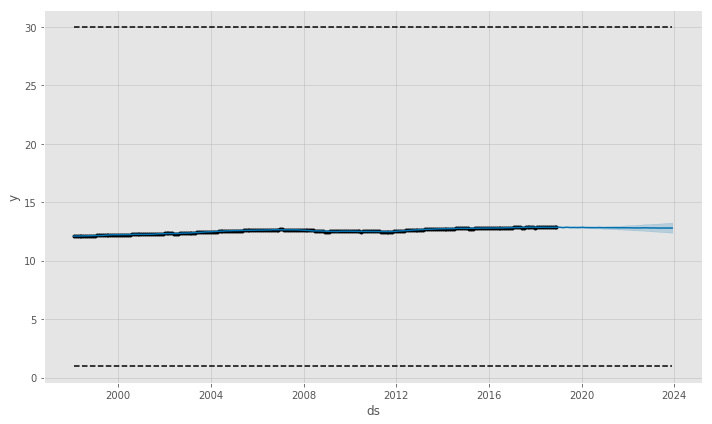

In [50]:
model.plot(forecast_data);

Visualizing Prophet models
In order to build a useful dataframe to visualize our model versus our original data, we need to combine the output of the Prophet model with our original data set, then we'll build a new chart manually using pandas and matplotlib.

First, let's set our dataframes to have the same index of ds

In [51]:
df2.set_index('ds', inplace=True)
forecast_data.set_index('ds', inplace=True)

df3.head()
df2.head()
df3.set_index('DATE', inplace=True)
viz_df = df3.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

If we look at the head(), we see the data has been joined correctly but the scales of our original data (sales) and our model (yhat) are different. We need to rescale the yhat colums(s) to get the same scale, so we'll use numpy's exp function to do that.

In [52]:
viz_df.head()

viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])
viz_df.head()


,ASPUS_M,yhat,yhat_lower,yhat_upper,yhat_rescaled
1998-02-01,179600.0000,12.096334,12.082908,12.111338,179213.606310
1998-03-01,179200.0000,12.100035,12.085592,12.114237,179878.159337
1998-04-01,178800.0000,12.106404,12.092787,12.120243,181027.396575
1998-05-01,180633.3333,12.106461,12.091173,12.120590,181037.714944
1998-06-01,182466.6667,12.105235,12.090747,12.119197,180815.946777


Let's take a look at the sales and yhat_rescaled data together in a chart.

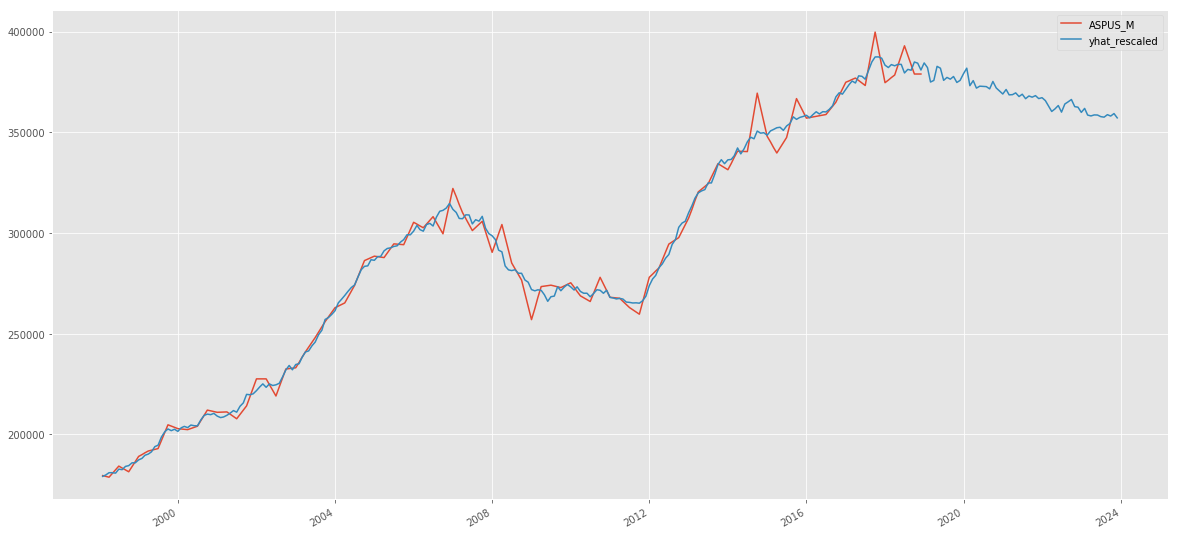

In [53]:
viz_df[['ASPUS_M', 'yhat_rescaled']].plot()


We can see downward trends in 60 months for AVE US HOUSING PRICE

You can see from the chart that the model (blue) is pretty good when plotted against the actual signal (orange) but I like to make my vizualization's a little better to understand. To build my 'better' visualization, we'll need to go back to our original df3 and forecast dataframes.

First things first - we need to find the 2nd to last date of the original sales data in sales_df in order to ensure the original sales data and model data charts are connected.

In [54]:
df3.index = pd.to_datetime(df3.index) #make sure our index as a datetime object
connect_date = df3.index[-2] #select the 2nd to last date

Using the connect_date we can now grab only the model data that after that date. To do this, we'll mask the forecast data.

In [55]:
mask = (forecast_data.index > connect_date)
predict_df = forecast_data.loc[mask]

predict_df.info()
predict_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2018-12-01 to 2023-11-30
Data columns (total 23 columns):
trend                         61 non-null float64
cap                           61 non-null int64
floor                         61 non-null int64
yhat_lower                    61 non-null float64
yhat_upper                    61 non-null float64
trend_lower                   61 non-null float64
trend_upper                   61 non-null float64
additive_terms                61 non-null float64
additive_terms_lower          61 non-null float64
additive_terms_upper          61 non-null float64
monthly                       61 non-null float64
monthly_lower                 61 non-null float64
monthly_upper                 61 non-null float64
weekly                        61 non-null float64
weekly_lower                  61 non-null float64
weekly_upper                  61 non-null float64
yearly                        61 non-null float64
yearly_lower                  6

,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2018-12-01,12.345789,30,1,12.835249,12.864221,12.345789,12.345789,0.504443,0.504443,0.504443,...,-0.003743,-0.003743,-0.003743,0.002636,0.002636,0.002636,0.0,0.0,0.0,12.850232
2018-12-31,12.344693,30,1,12.843518,12.873833,12.344693,12.344693,0.514764,0.514764,0.514764,...,-0.000588,-0.000588,-0.000588,0.003305,0.003305,0.003305,0.0,0.0,0.0,12.859457
2019-01-31,12.343562,30,1,12.837950,12.868606,12.343562,12.343562,0.509844,0.509844,0.509844,...,-0.004294,-0.004294,-0.004294,0.004772,0.004772,0.004772,0.0,0.0,0.0,12.853406
2019-02-28,12.342539,30,1,12.819419,12.849834,12.342539,12.342539,0.491945,0.491945,0.491945,...,-0.004294,-0.004294,-0.004294,-0.006750,-0.006750,-0.006750,0.0,0.0,0.0,12.834484
2019-03-31,12.341408,30,1,12.820290,12.852200,12.340990,12.341918,0.495207,0.495207,0.495207,...,-0.000205,-0.000205,-0.000205,-0.010138,-0.010138,-0.010138,0.0,0.0,0.0,12.836615


Now, let's build a dataframe to use in our new visualization. We'll follow the same steps we did before.

In [56]:
viz_df = df3.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

Now, if we take a look at the head() of viz_df we'll see 'NaN's everywhere except for our original data rows.

In [58]:
viz_df.head(3)

,ASPUS_M,yhat,yhat_lower,yhat_upper,yhat_scaled
1998-02-01,179600.0,NaN,NaN,NaN,NaN
1998-03-01,179200.0,NaN,NaN,NaN,NaN
1998-04-01,178800.0,NaN,NaN,NaN,NaN


If we take a look at the tail() of the viz_df you'll see we have data for the forecasted data and NaN's for the original data series.

In [59]:
viz_df.tail()

,ASPUS_M,yhat,yhat_lower,yhat_upper,yhat_scaled
2023-07-31,NaN,12.786866,12.435150,13.207405,357491.212883
2023-08-31,NaN,12.790330,12.420118,13.220739,358731.641710
2023-09-30,NaN,12.788353,12.407588,13.230428,358023.086766
2023-10-31,NaN,12.791838,12.401196,13.236067,359273.039628
2023-11-30,NaN,12.785865,12.386704,13.252775,357133.464685


# Time to plot
Now, let's plot everything to get the 'final' visualization of our sales data and forecast with errors.

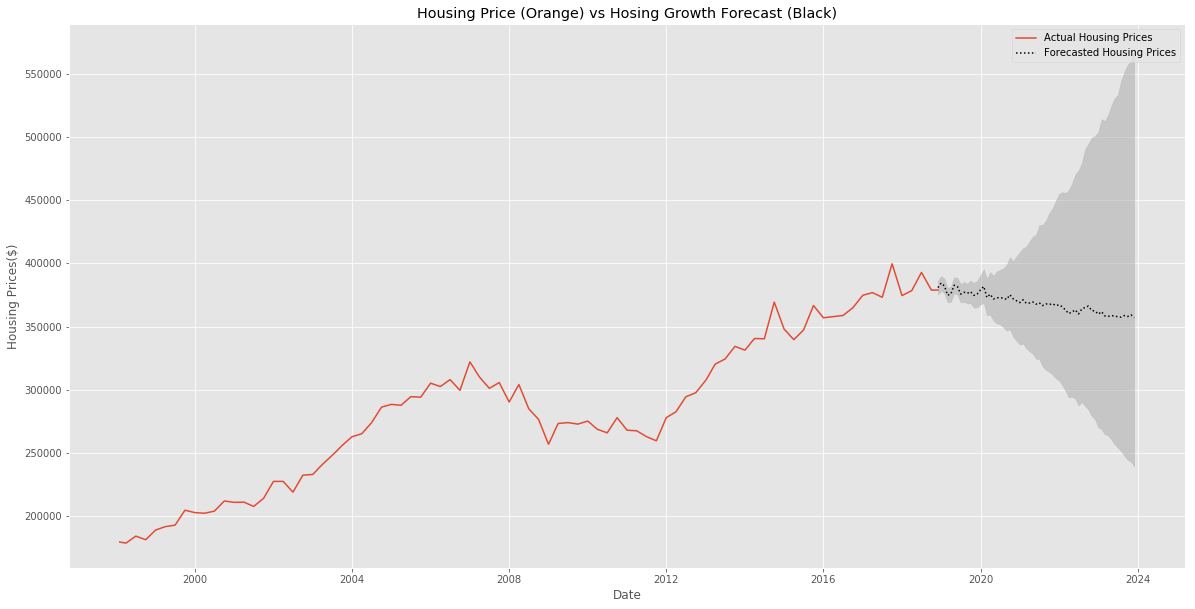

In [60]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.ASPUS_M)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Housing Price (Orange) vs Hosing Growth Forecast (Black)')
ax1.set_ylabel('Housing Prices($)')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual Housing Prices') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted Housing Prices') #change the legend text for 2nd plot